Data source: [Current Paris Properties For Sale](https://dagshub.com/Omdena/ParisFranceChapter_HousingAffordabilityAnalysis/src/development/src/data/Current%20Paris%20Properties%20For%20Sale.xlsx)

This notebook contains a thorough analysis of data about Properties in Paris for Sales.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load Data**

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Current Paris Properties For Sale.xlsx')
df.head()

,Proprety_name,Price (dollars),Year_Built,Property_Type,Area (sq ft),Tax (dollars/year),Total_room,Bedroom,Bathroom,Area_code,Price (euros),Prop_size (m^2),Website
0,Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...,641304,1875.0,Apartments,430.0,612.0,3.0,1.0,1.0,75018,589999.0,39,https://www.sothebysrealty.com/eng
1,Renovated flat with open view - Paris 4th - Ma...,635870,1860.0,Apartments,452.0,465.0,2.0,1.0,1.0,75004,585000.0,41,https://www.sothebysrealty.com/eng
2,Saint-Germain-des-PrÃ©s / rue Cassette,630435,NaN,Apartments,409.0,NaN,NaN,1.0,2.0,75006,580000.0,37,https://www.sothebysrealty.com/eng
3,Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...,630435,NaN,Apartments,495.0,NaN,2.0,1.0,2.0,75008,580000.0,45,https://www.sothebysrealty.com/eng
4,Saint-Germain-des-PrÃ©s,608696,1800.0,Apartments,312.0,NaN,NaN,1.0,2.0,75006,560000.0,28,https://www.sothebysrealty.com/eng


## **Pre-processing**

In [4]:
df.shape

(846, 13)

In [5]:
#Dropping irrelevant columns
data = df.drop(['Website'], axis=1)
data.head()

,Proprety_name,Price (dollars),Year_Built,Property_Type,Area (sq ft),Tax (dollars/year),Total_room,Bedroom,Bathroom,Area_code,Price (euros),Prop_size (m^2)
0,Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...,641304,1875.0,Apartments,430.0,612.0,3.0,1.0,1.0,75018,589999.0,39
1,Renovated flat with open view - Paris 4th - Ma...,635870,1860.0,Apartments,452.0,465.0,2.0,1.0,1.0,75004,585000.0,41
2,Saint-Germain-des-PrÃ©s / rue Cassette,630435,NaN,Apartments,409.0,NaN,NaN,1.0,2.0,75006,580000.0,37
3,Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...,630435,NaN,Apartments,495.0,NaN,2.0,1.0,2.0,75008,580000.0,45
4,Saint-Germain-des-PrÃ©s,608696,1800.0,Apartments,312.0,NaN,NaN,1.0,2.0,75006,560000.0,28


####**Fixing data types**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proprety_name       846 non-null    object 
 1   Price (dollars)     828 non-null    object 
 2   Year_Built          646 non-null    float64
 3   Property_Type       846 non-null    object 
 4   Area (sq ft)        846 non-null    float64
 5   Tax (dollars/year)  204 non-null    float64
 6   Total_room          244 non-null    float64
 7   Bedroom             820 non-null    float64
 8   Bathroom            823 non-null    float64
 9   Area_code           846 non-null    int64  
 10  Price (euros)       844 non-null    float64
 11  Prop_size (m^2)     846 non-null    int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 79.4+ KB


In [7]:
#Convert Price (dollars) column data type into numeric and replace errors with NaN
data['Price (dollars)'] = pd.to_numeric(data['Price (dollars)'],errors='coerce')
data

,Proprety_name,Price (dollars),Year_Built,Property_Type,Area (sq ft),Tax (dollars/year),Total_room,Bedroom,Bathroom,Area_code,Price (euros),Prop_size (m^2)
0,Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...,641304.0,1875.0,Apartments,430.00,612.0,3.0,1.0,1.0,75018,589999.0,39
1,Renovated flat with open view - Paris 4th - Ma...,635870.0,1860.0,Apartments,452.00,465.0,2.0,1.0,1.0,75004,585000.0,41
2,Saint-Germain-des-PrÃ©s / rue Cassette,630435.0,NaN,Apartments,409.00,NaN,NaN,1.0,2.0,75006,580000.0,37
3,Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...,630435.0,NaN,Apartments,495.00,NaN,2.0,1.0,2.0,75008,580000.0,45
4,Saint-Germain-des-PrÃ©s,608696.0,1800.0,Apartments,312.00,NaN,NaN,1.0,2.0,75006,560000.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
841,Paris 16th District - A stoneâ€™s throw from t...,NaN,1990.0,apartment,5500.40,NaN,NaN,7.0,0.0,75016,0.0,506
842,Paris 4th District - A magnificent property in...,32173913.0,NaN,apartment,5629.57,NaN,NaN,6.0,0.0,75004,29599999.0,517
843,Paris 16th District - A sumptuous private mansion,NaN,NaN,villa/townhouse,15715.44,NaN,NaN,8.0,8.0,75016,0.0,1445
844,Paris 16th District - A magnificent private ma...,NaN,NaN,villa/townhouse,10893.17,NaN,NaN,6.0,6.0,75016,0.0,1002


####**Handling missing data**

In [8]:
#Finding missing values for each column
missing_values = data.isnull().sum()
missing_values

Proprety_name           0
Price (dollars)        19
Year_Built            200
Property_Type           0
Area (sq ft)            0
Tax (dollars/year)    642
Total_room            602
Bedroom                26
Bathroom               23
Area_code               0
Price (euros)           2
Prop_size (m^2)         0
dtype: int64

In [9]:
#Filling missing values with the mean value
#For year data, value is kept null as the date range is big

data['Price (dollars)'].fillna(data['Price (dollars)'].mean(), inplace=True)
data['Tax (dollars/year)'].fillna(data['Tax (dollars/year)'].mean(),inplace=True)
data['Total_room'].fillna(data['Total_room'].mean(), inplace=True)
data['Bedroom'].fillna(data['Bedroom'].mean(), inplace=True)
data['Bathroom'].fillna(data['Bathroom'].mean(), inplace=True)
data['Price (euros)'].fillna(data['Price (euros)'].mean(), inplace=True)

missing_values_after = data.isnull().sum()
missing_values_after


Proprety_name           0
Price (dollars)         0
Year_Built            200
Property_Type           0
Area (sq ft)            0
Tax (dollars/year)      0
Total_room              0
Bedroom                 0
Bathroom                0
Area_code               0
Price (euros)           0
Prop_size (m^2)         0
dtype: int64

####**Filtering out incorrect data for Year_Built column**

In [10]:
current_year = datetime.now().year

# Count rows where year_built is greater than the current year
count = data[data['Year_Built'] > current_year].shape[0]
count

2

In [11]:
#Filtered out rows having Year_Built greater than current year
df_filtered = data[data['Year_Built'] <= current_year]
data = df_filtered

####**Categorical Data**

In [12]:
#Category data ---> Property type
category = data['Property_Type'].unique()
category

array(['Apartments', 'Single Family Homes', 'Duplex Homes', 'Townhouse',
       'apartment', 'villa/townhouse', 'commercial / office'],
      dtype=object)

In [13]:
#Fixed categorical data for apartments having different labels
data.loc[:,'Property_Type'] = data['Property_Type'].replace('apartment', 'Apartments')
updated_category = data['Property_Type'].unique()
updated_category

array(['Apartments', 'Single Family Homes', 'Duplex Homes', 'Townhouse',
       'villa/townhouse', 'commercial / office'], dtype=object)

##**Handling Outliers**

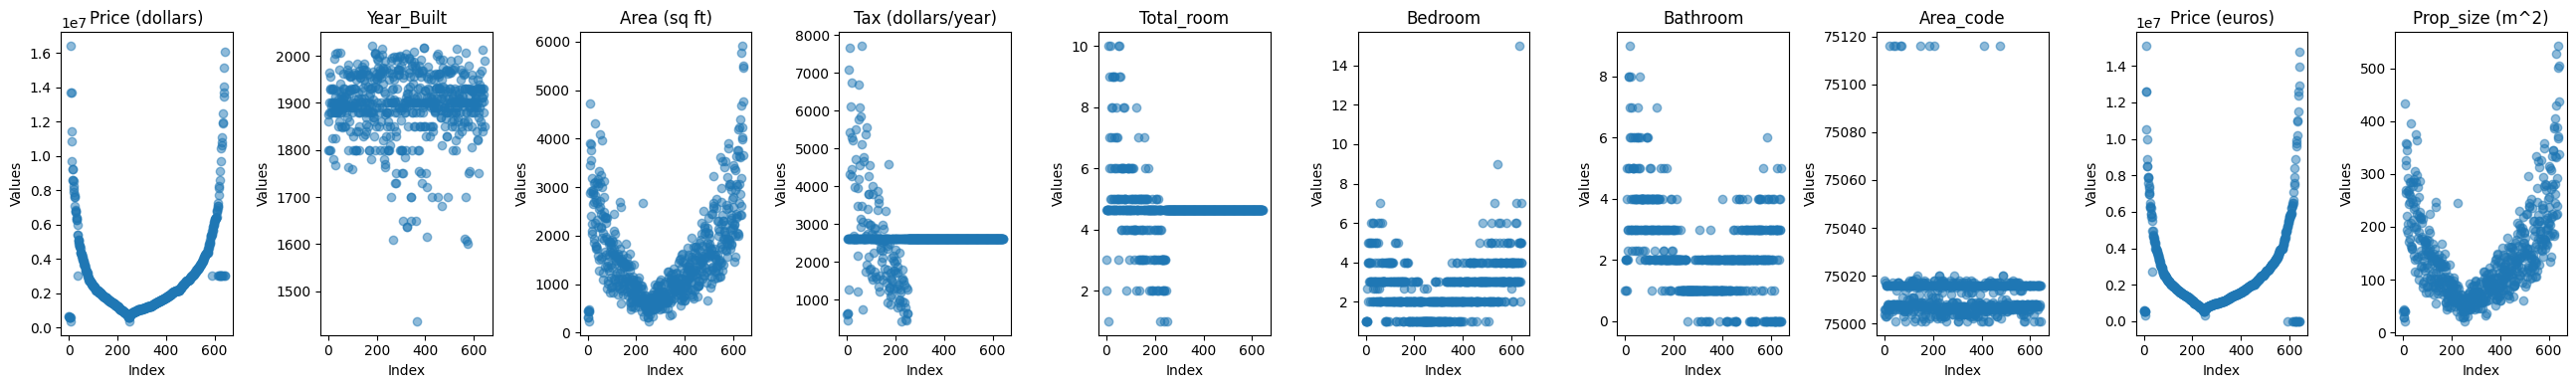

In [14]:
#Outliers
numeric_df = data.select_dtypes(include=[np.number])

# Plot scatter plots and identify outliers for each numeric column

plt.figure(figsize=(26, 4))
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(1, len(numeric_df.columns), i)
    plt.scatter(np.arange(len(numeric_df)), numeric_df[column], alpha=0.5)
    plt.title(f'{column}')
    plt.xlabel('Index')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

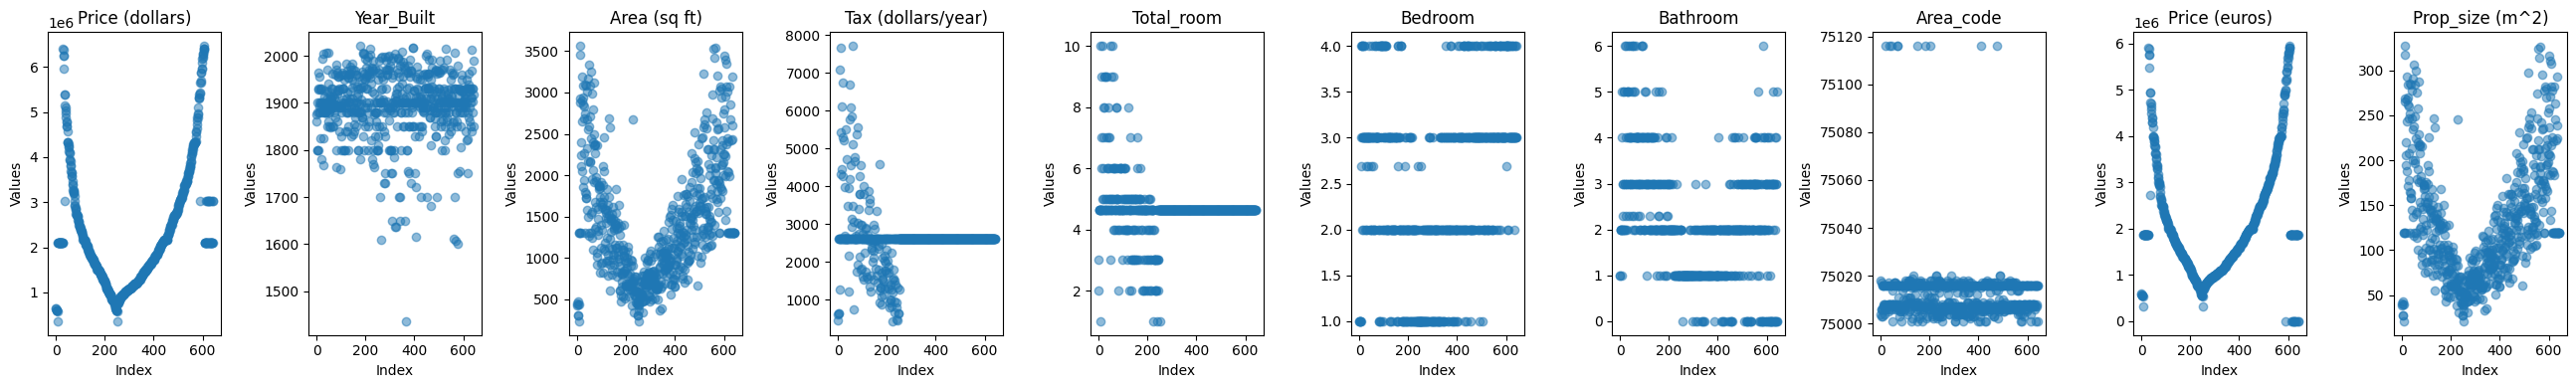

In [15]:
#Replacing outliers with median value for each numeric column
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = column.median()
    return column.apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# List of columns to handle outliers
columns_to_handle = ['Area (sq ft)','Bedroom','Bathroom','Price (dollars)','Price (euros)','Prop_size (m^2)']

# Apply the function to the specified columns
for column in columns_to_handle:
    #data[column] = replace_outliers_with_median(data[column])
    data.loc[:, column] = replace_outliers_with_median(data[column])

#Displaying scatter plot after adjusting outliers
without_outliers = data.select_dtypes(include=[np.number])

plt.figure(figsize=(26, 4))
for i, column in enumerate(without_outliers.columns, 1):
    plt.subplot(1, len(without_outliers.columns), i)
    plt.scatter(np.arange(len(without_outliers)), without_outliers[column], alpha=0.5)
    plt.title(f'{column}')
    plt.xlabel('Index')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


In [16]:
data.describe()

,Price (dollars),Year_Built,Area (sq ft),Tax (dollars/year),Total_room,Bedroom,Bathroom,Area_code,Price (euros),Prop_size (m^2)
count,6.440000e+02,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,6.440000e+02,644.000000
mean,2.308634e+06,1896.114907,1406.239891,2611.542306,4.652887,2.471841,2.122097,75012.169255,2.072900e+06,128.900621
std,1.321105e+06,71.409466,722.383984,784.613070,1.006820,0.933511,1.297502,14.034647,1.243203e+06,66.462453
min,3.576090e+05,1436.000000,236.000000,434.000000,1.000000,1.000000,0.000000,75001.000000,0.000000e+00,21.000000
25%,1.301630e+06,1880.000000,838.232500,2614.519608,4.635246,2.000000,1.000000,75006.000000,1.150000e+06,76.750000
50%,2.088316e+06,1900.000000,1303.275000,2614.519608,4.635246,3.000000,2.000000,75008.000000,1.876249e+06,119.250000
75%,2.989130e+06,1935.000000,1800.052500,2614.519608,4.635246,3.000000,3.000000,75016.000000,2.600000e+06,165.250000
max,6.467391e+06,2021.000000,3562.000000,7717.000000,10.000000,4.000000,6.000000,75116.000000,5.949999e+06,327.000000


##**Visualizations**

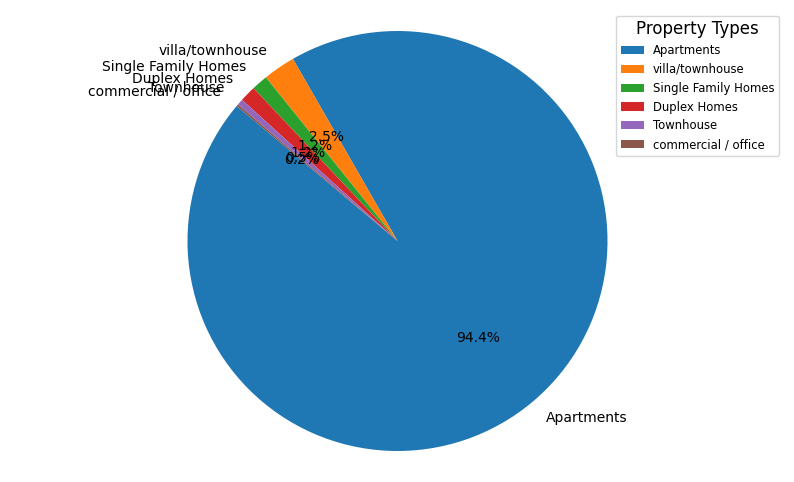

In [17]:
#Pie chart for categorical data

property_counts = data['Property_Type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(10, 6))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend(loc='best', fontsize='small', title='Property Types', title_fontsize='large')  # Add legend with better readability
plt.show()

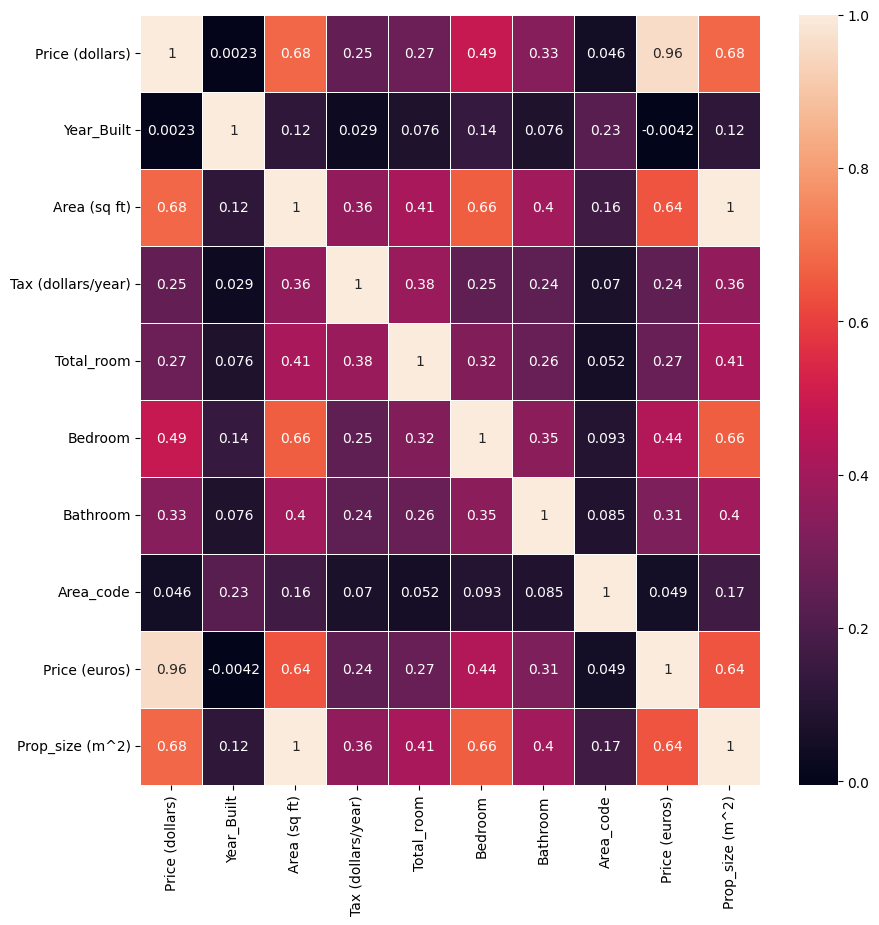

In [18]:
#Correlation matrix
corr_matrix = without_outliers.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5)
plt.show()

In [19]:
#Correlation of Price(euros) with other features
without_outliers[without_outliers.columns[1:]].corr()['Price (euros)'][:-1]

Year_Built           -0.004184
Area (sq ft)          0.642146
Tax (dollars/year)    0.244098
Total_room            0.265519
Bedroom               0.435885
Bathroom              0.313986
Area_code             0.049032
Price (euros)         1.000000
Name: Price (euros), dtype: float64

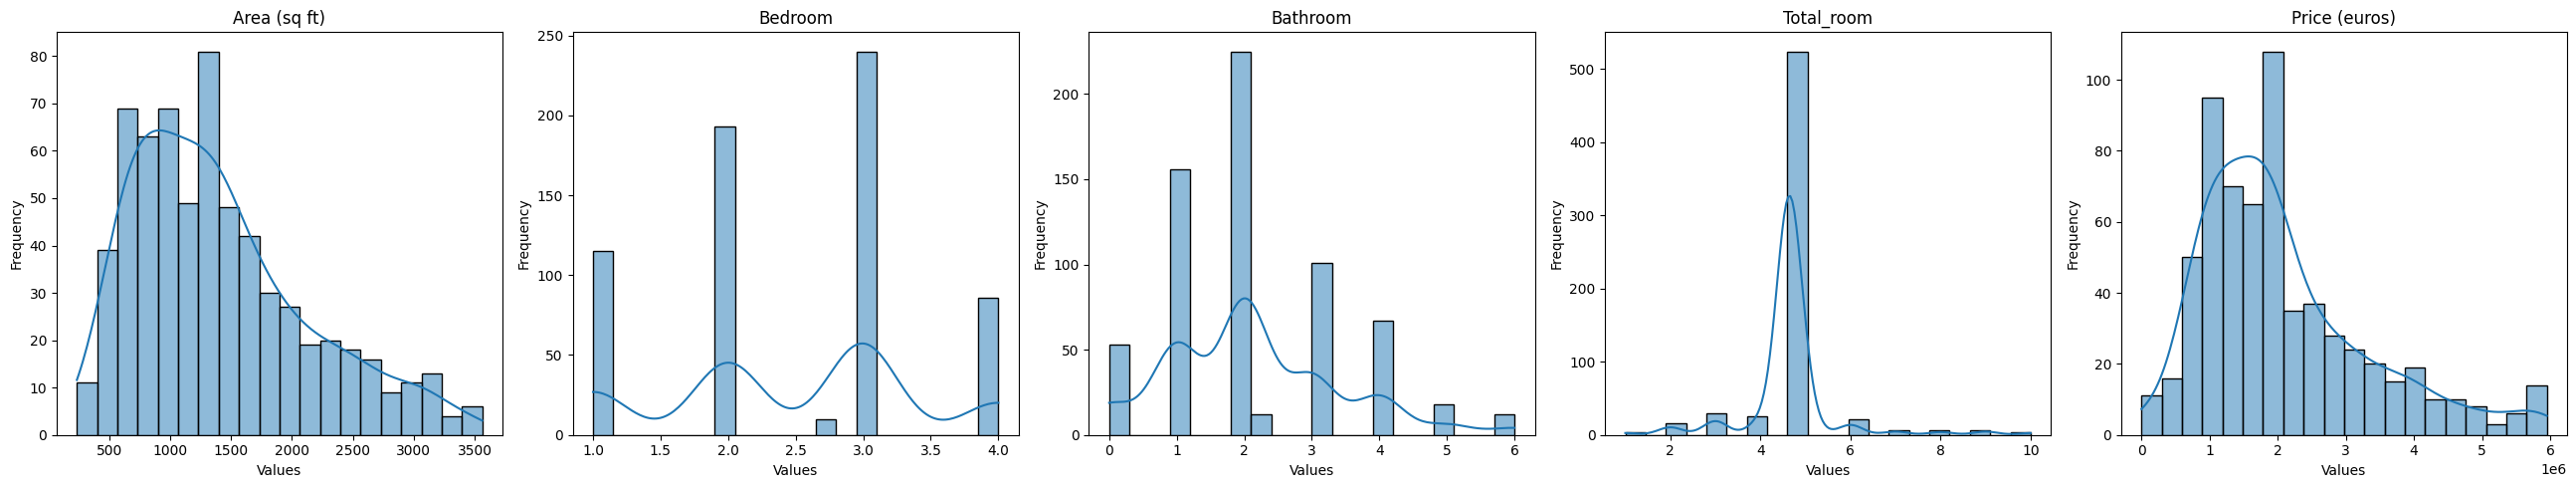

In [24]:
#Outputs
col_to_analyse = ['Area (sq ft)','Bedroom','Bathroom','Total_room','Price (euros)']

data_to_analyse = without_outliers[col_to_analyse]

plt.figure(figsize=(26, 5))
for i, column in enumerate(data_to_analyse.columns, 1):
    plt.subplot(1, len(data_to_analyse.columns), i)
    sns.histplot(data_to_analyse[column],bins=20, kde=True)
    plt.title(f'{column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()